In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from yellowbrick.model_selection import rfecv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv("D:\ExcelR_Assignments\Random_Forest\Datasets\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
threshold = 30000
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins=[float('-inf'), threshold, float('inf')], labels=['Good', 'Risky'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Risky,50047,10,YES
1,YES,Divorced,Risky,134075,18,YES
2,NO,Married,Risky,160205,30,YES
3,YES,Single,Risky,193264,15,YES
4,NO,Married,Risky,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Risky,39492,7,YES
596,YES,Divorced,Risky,55369,2,YES
597,NO,Divorced,Risky,154058,0,YES
598,YES,Married,Risky,180083,17,NO


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [5]:
data = pd.get_dummies(columns = ['Undergrad', 'Marital.Status', 'Urban'], data = df)

In [6]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Risky,50047,10,1,0,0,0,1,0,1
1,Risky,134075,18,0,1,1,0,0,0,1
2,Risky,160205,30,1,0,0,1,0,0,1
3,Risky,193264,15,0,1,0,0,1,0,1
4,Risky,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Risky,39492,7,0,1,1,0,0,0,1
596,Risky,55369,2,0,1,1,0,0,0,1
597,Risky,154058,0,1,0,1,0,0,0,1
598,Risky,180083,17,0,1,0,1,0,1,0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0
Undergrad_NO,600.0,0.480000,0.500017,0.0,0.00,0.0,1.00,1.0
Undergrad_YES,600.0,0.520000,0.500017,0.0,0.00,1.0,1.00,1.0
Marital.Status_Divorced,600.0,0.315000,0.464903,0.0,0.00,0.0,1.00,1.0
Marital.Status_Married,600.0,0.323333,0.468139,0.0,0.00,0.0,1.00,1.0
Marital.Status_Single,600.0,0.361667,0.480884,0.0,0.00,0.0,1.00,1.0
Urban_NO,600.0,0.496667,0.500406,0.0,0.00,0.0,1.00,1.0
Urban_YES,600.0,0.503333,0.500406,0.0,0.00,1.0,1.00,1.0


In [8]:
data.isna().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

In [9]:
data.corr()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
City.Population,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<Axes: >

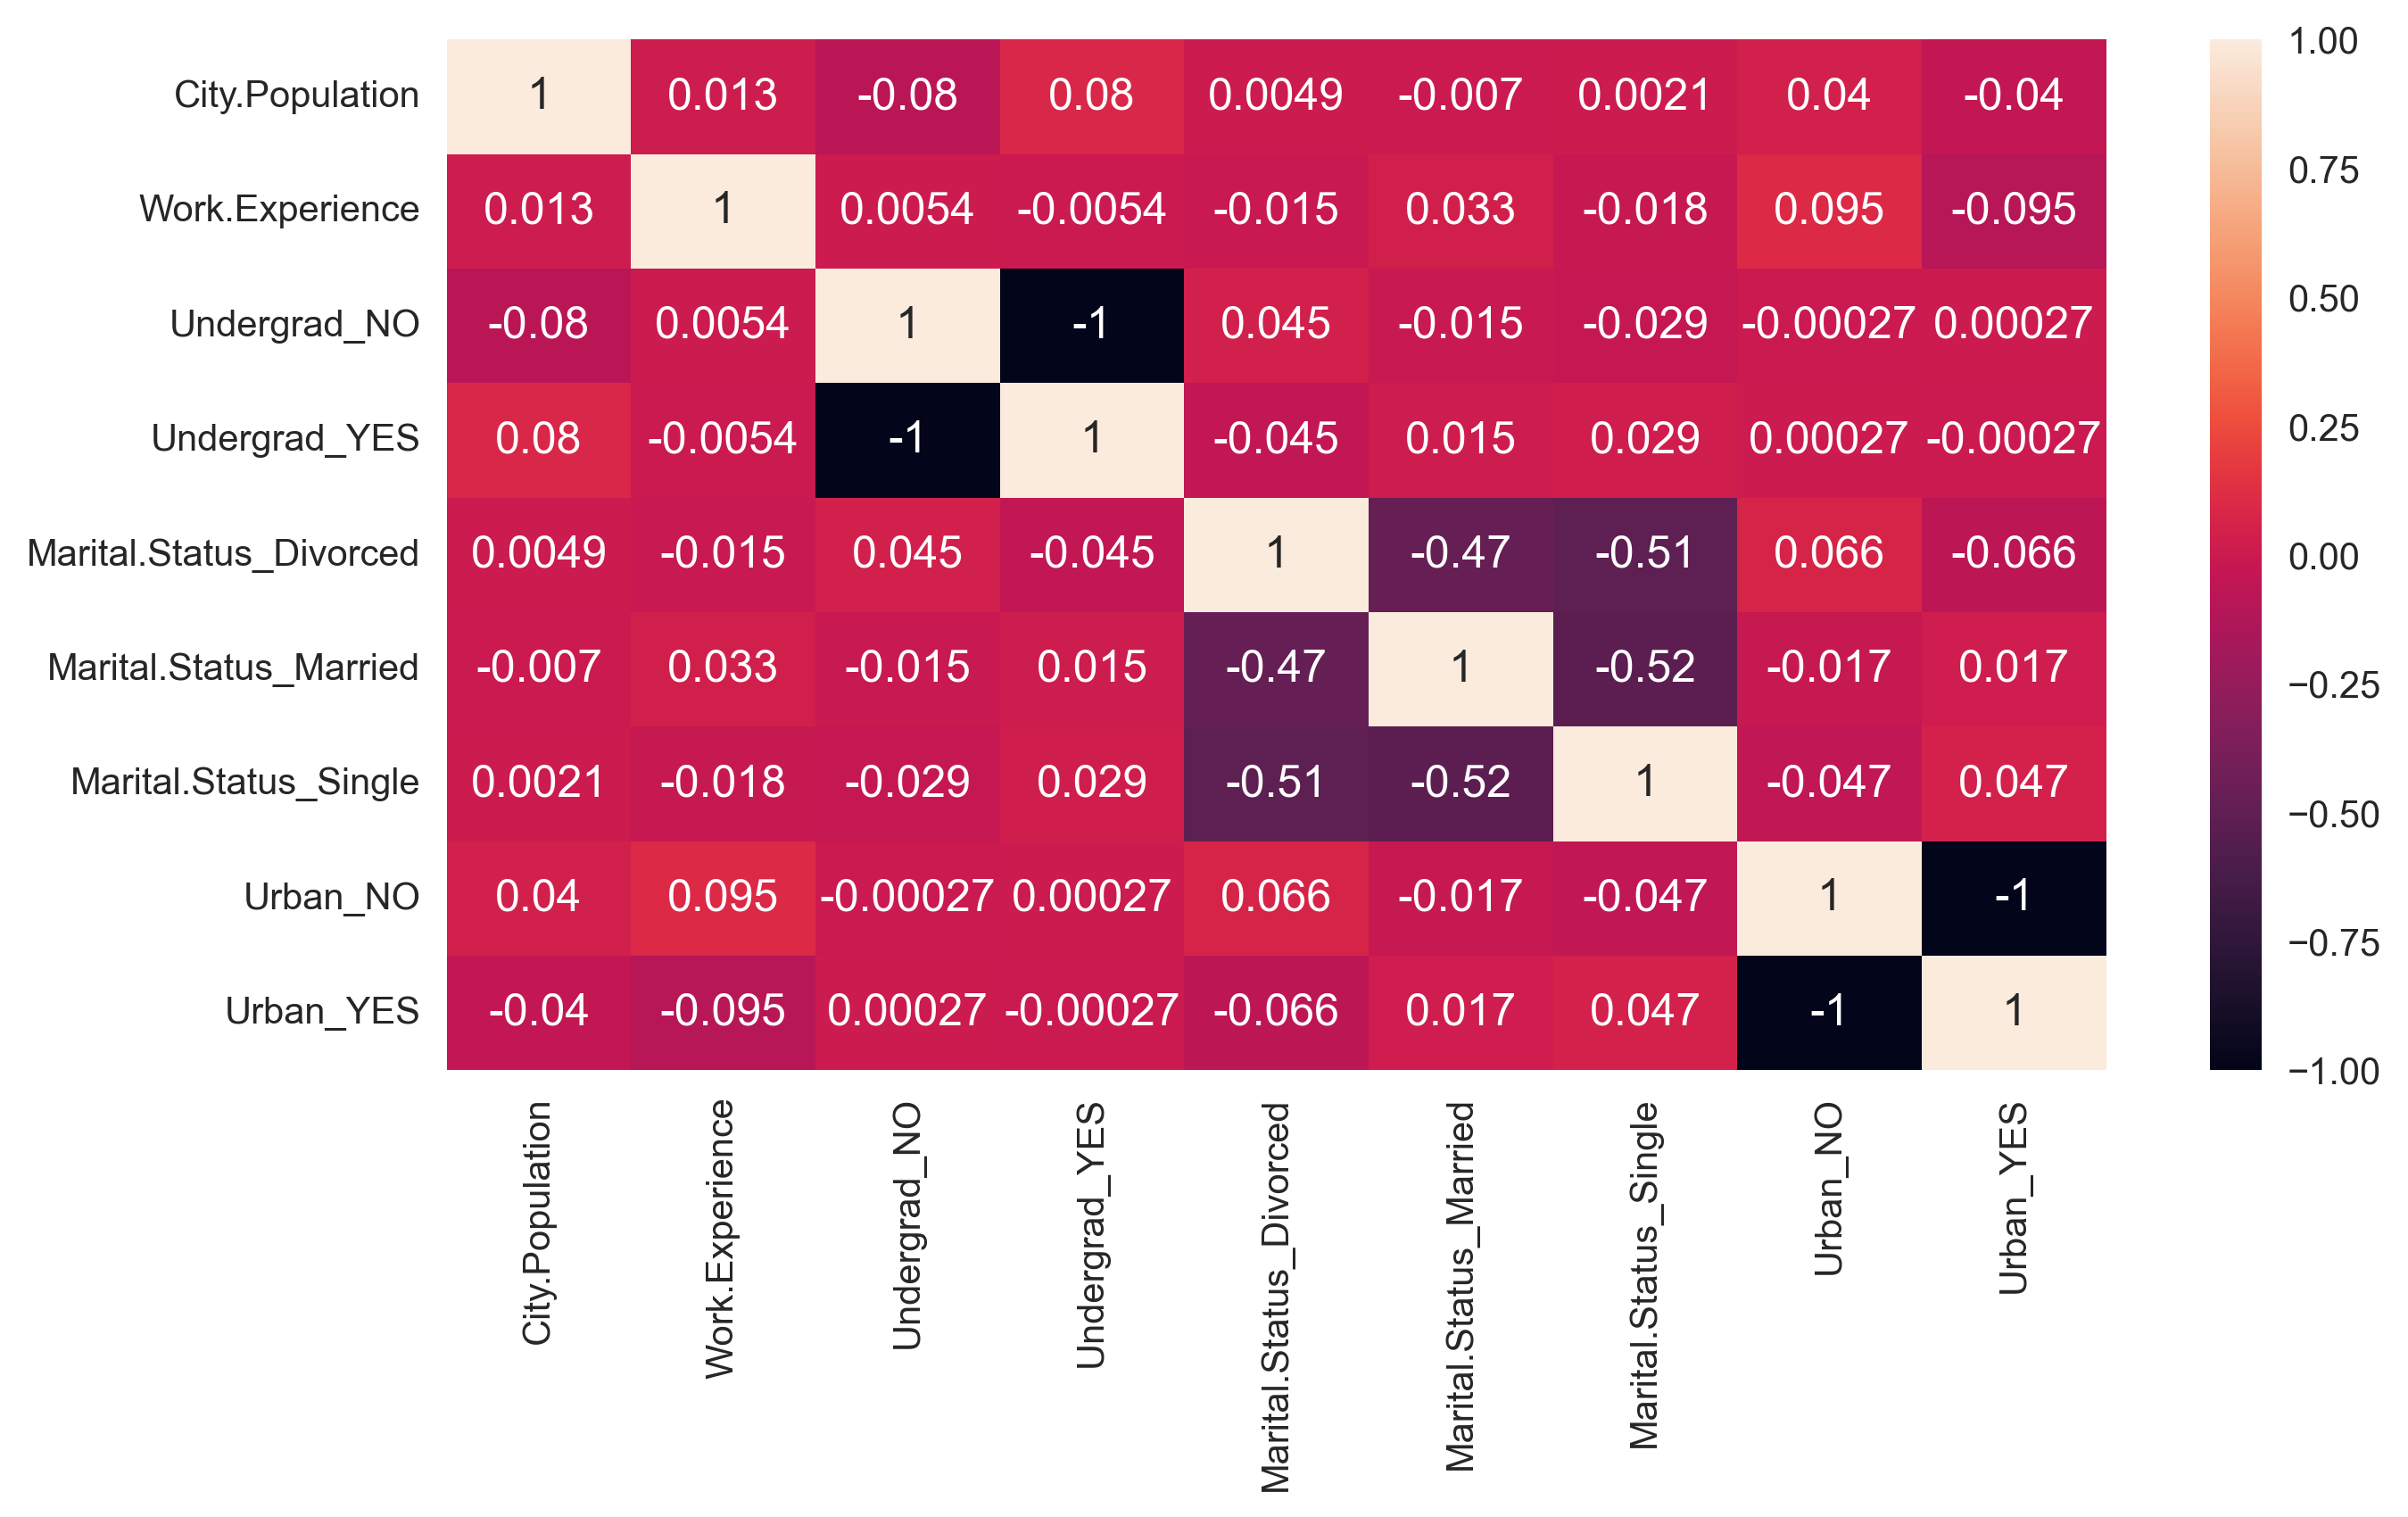

In [10]:
sns.heatmap(data.corr(), annot=True)

In [11]:
# Splitting data

In [12]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
# Baseline Model Building

In [15]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
ypred

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 

In [16]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        23
       Risky       0.80      0.93      0.86        97

    accuracy                           0.75       120
   macro avg       0.40      0.46      0.43       120
weighted avg       0.64      0.75      0.69       120



In [17]:
# Visualizing Random Forest 

In [18]:
len(rfc.estimators_)

100

In [19]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=889273273)

In [20]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

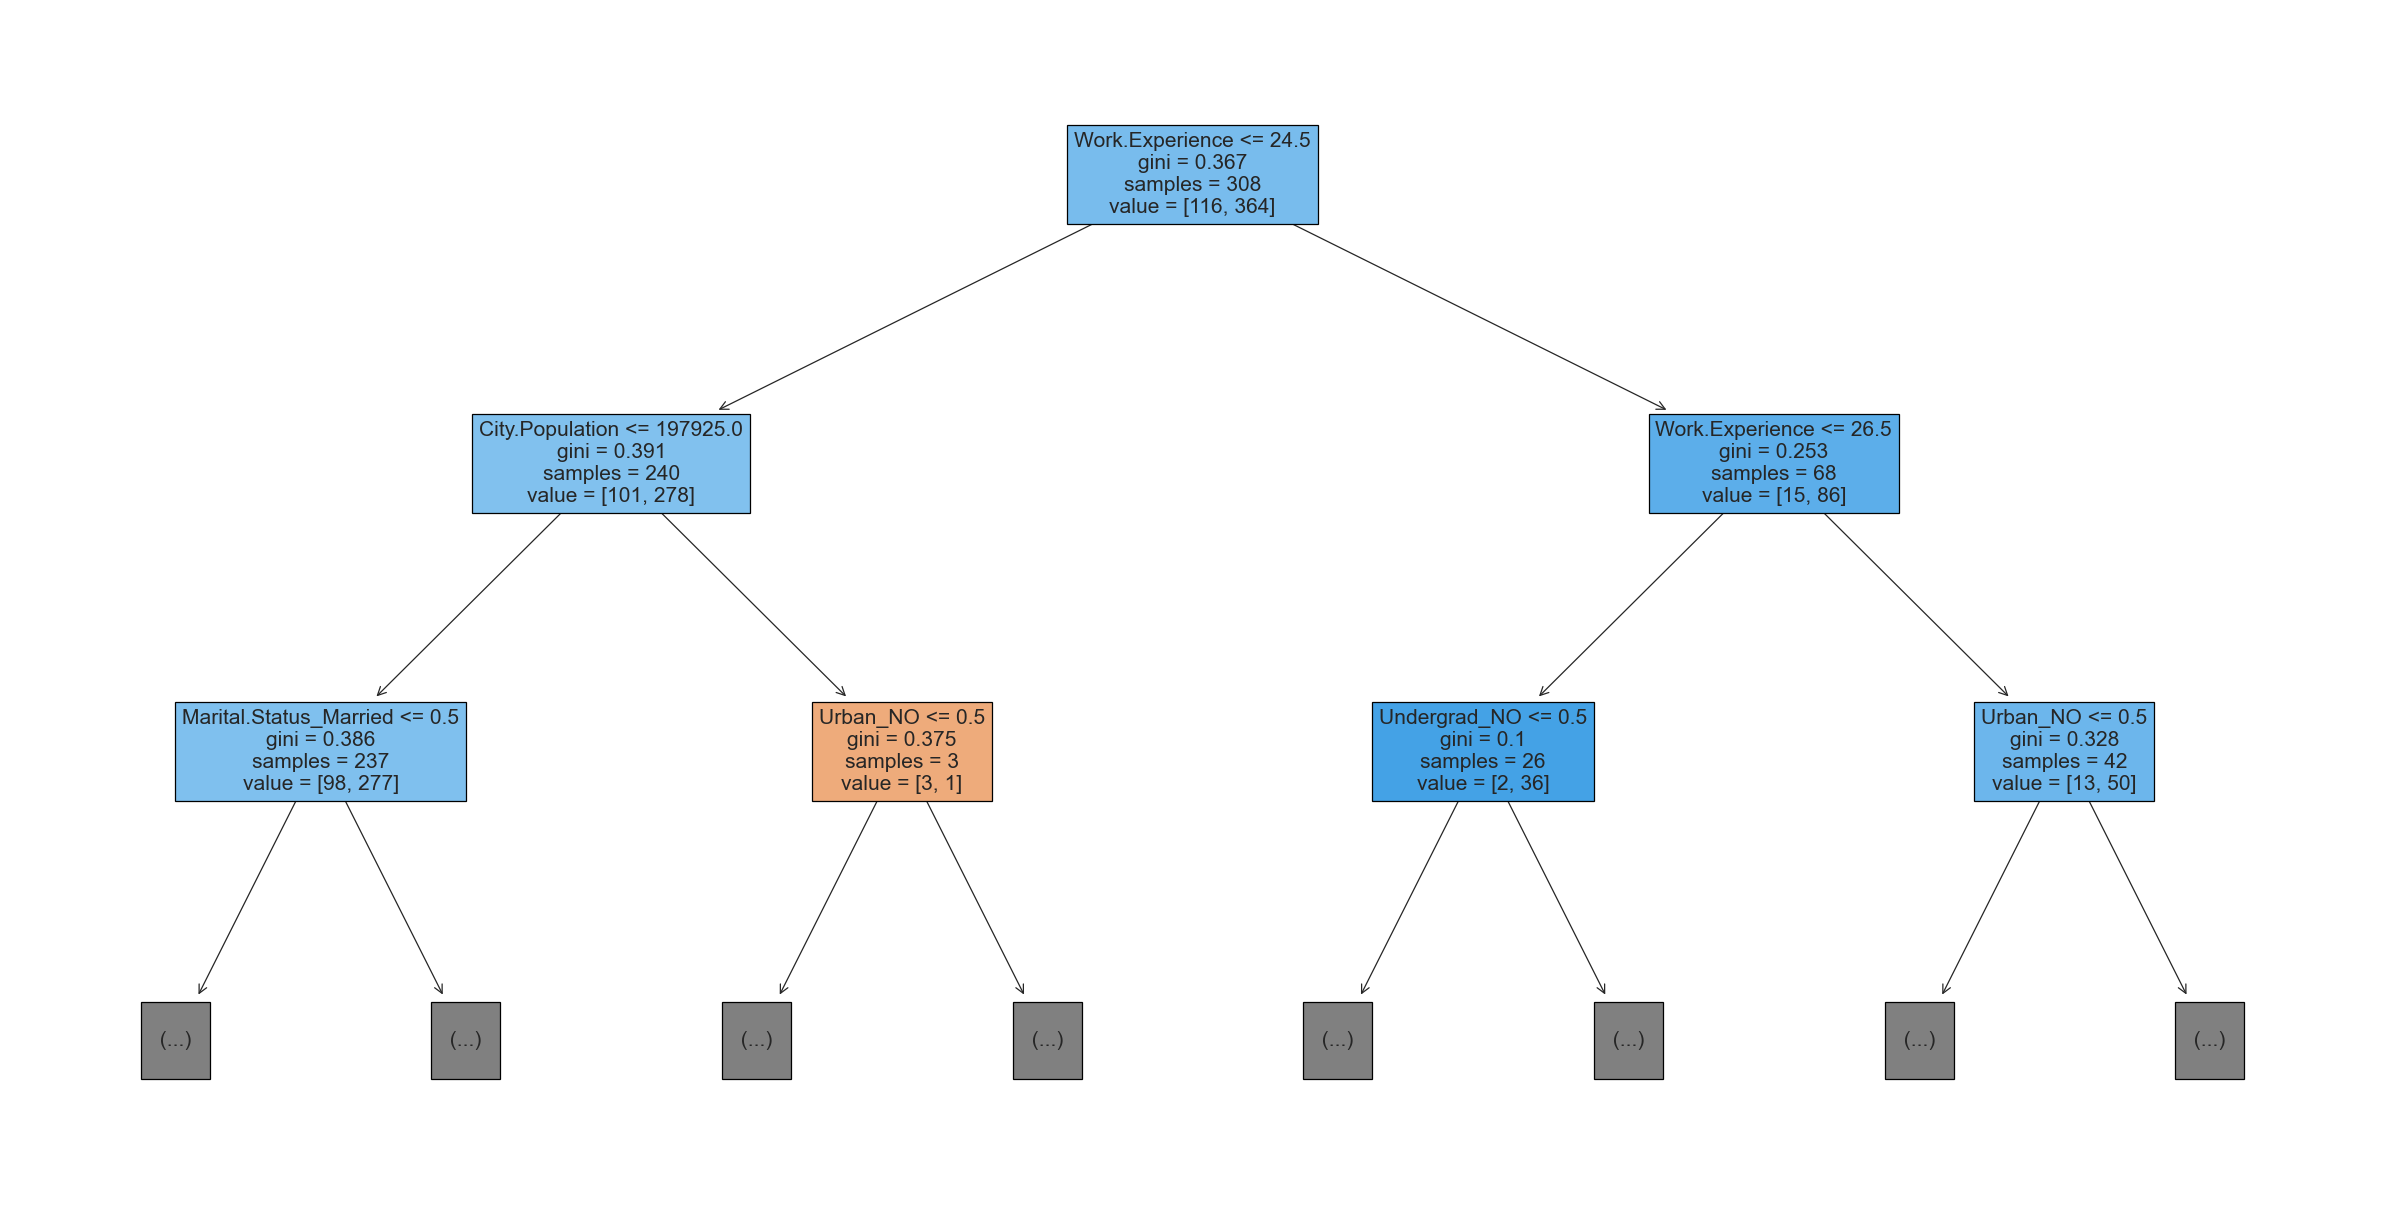

In [21]:
tree.plot_tree(rfc.estimators_[0], feature_names=['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'], filled=True, max_depth=2)
plt.show()

In [22]:
# Checking Information Gain 

In [23]:
rfc.feature_importances_

array([0.50667901, 0.36226774, 0.0180958 , 0.01783251, 0.02114654,
       0.02196997, 0.01765913, 0.01747305, 0.01687624])

In [24]:
ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : rfc.feature_importances_
})
ig_sel.sort_values(by='info_gain', ascending=False)

,features,info_gain
0,City.Population,0.506679
1,Work.Experience,0.362268
5,Marital.Status_Married,0.021970
4,Marital.Status_Divorced,0.021147
2,Undergrad_NO,0.018096
3,Undergrad_YES,0.017833
6,Marital.Status_Single,0.017659
7,Urban_NO,0.017473
8,Urban_YES,0.016876


In [25]:
# RFE (Recursive Feature Elimination) for optimal no. of Feature Selection

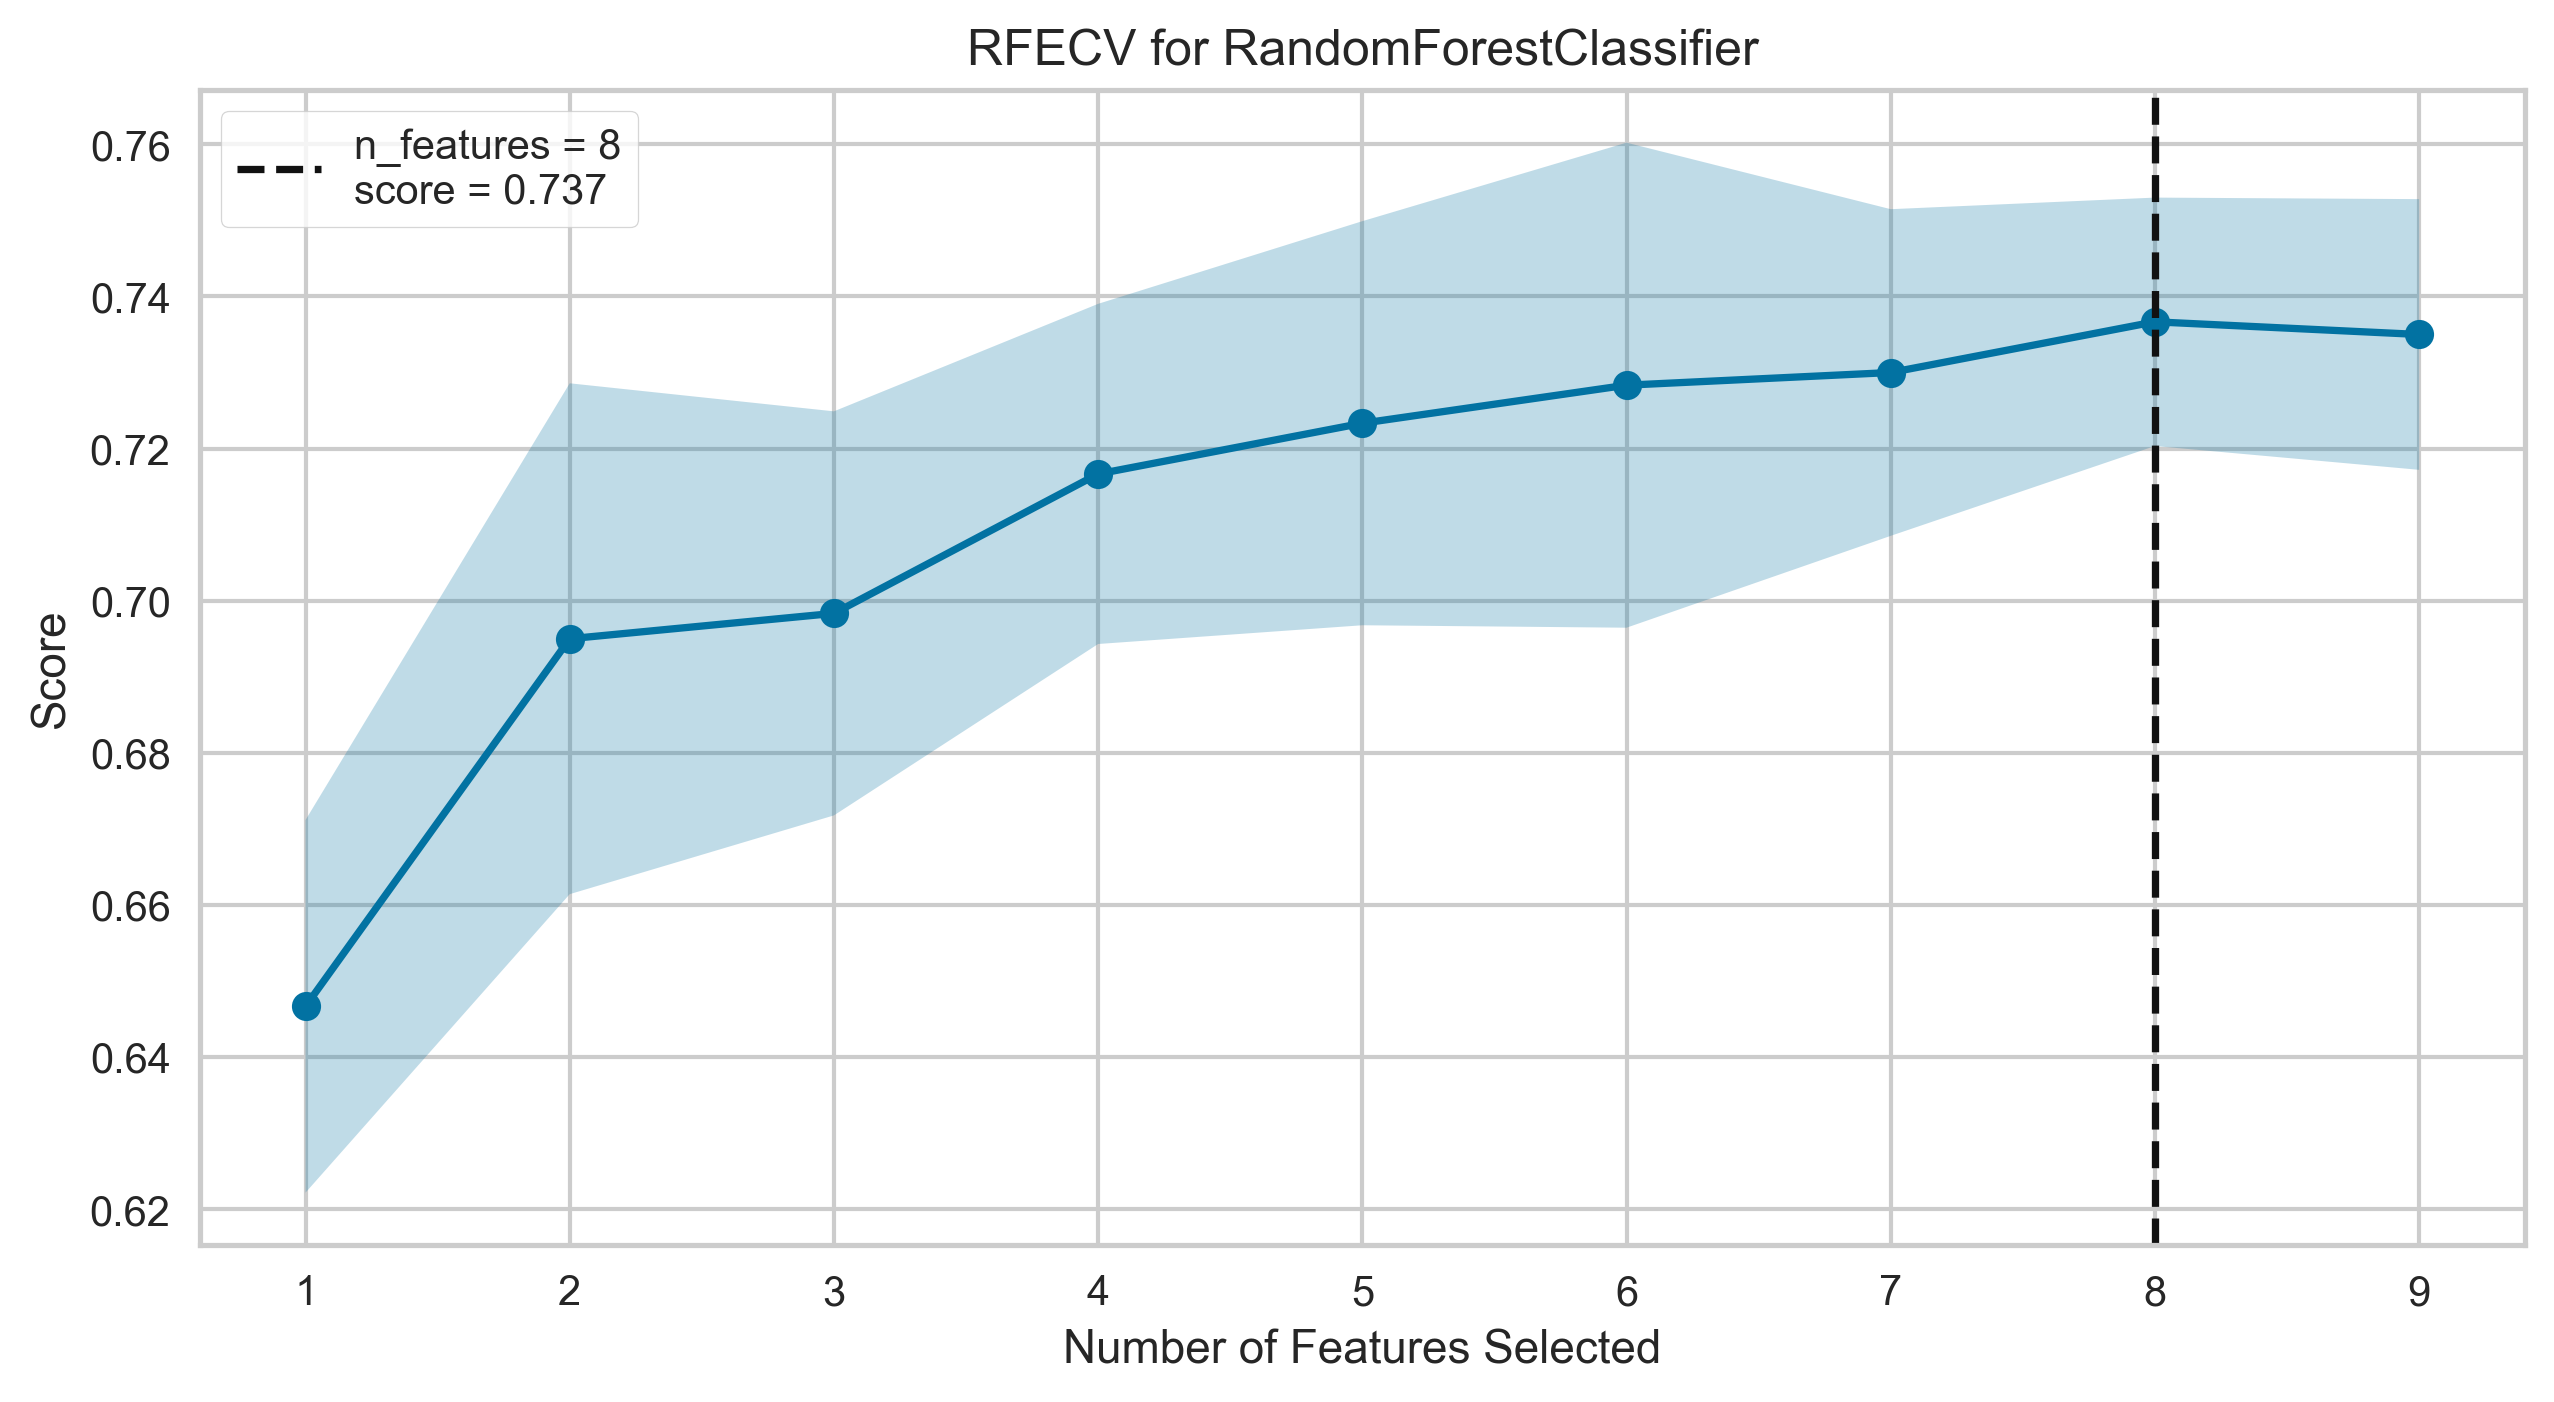

In [26]:
rfe = rfecv(RandomForestClassifier(), x, y)

In [27]:
rfe.ranking_

array([1, 1, 1, 1, 2, 1, 1, 1, 1])

In [28]:
rfe_sel = pd.DataFrame({
    'ranking' : rfe.ranking_,
    'features' : x.columns
})
rfe_sel
rfe_sel[rfe_sel['ranking']==1]

,ranking,features
0,1,City.Population
1,1,Work.Experience
2,1,Undergrad_NO
3,1,Undergrad_YES
5,1,Marital.Status_Married
6,1,Marital.Status_Single
7,1,Urban_NO
8,1,Urban_YES


In [30]:
x = data[['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES','Marital.Status_Divorced', 'Marital.Status_Married', 'Urban_NO', 'Urban_YES']]
y = data['Taxable.Income']

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
rfc2 = RandomForestClassifier()
rfc2.fit(xtrain, ytrain)
ypred2 = rfc2.predict(xtest)
ypred2

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 

In [33]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        23
       Risky       0.80      0.93      0.86        97

    accuracy                           0.75       120
   macro avg       0.40      0.46      0.43       120
weighted avg       0.64      0.75      0.69       120



In [34]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married', 'Urban_NO',
       'Urban_YES'],
      dtype='object')

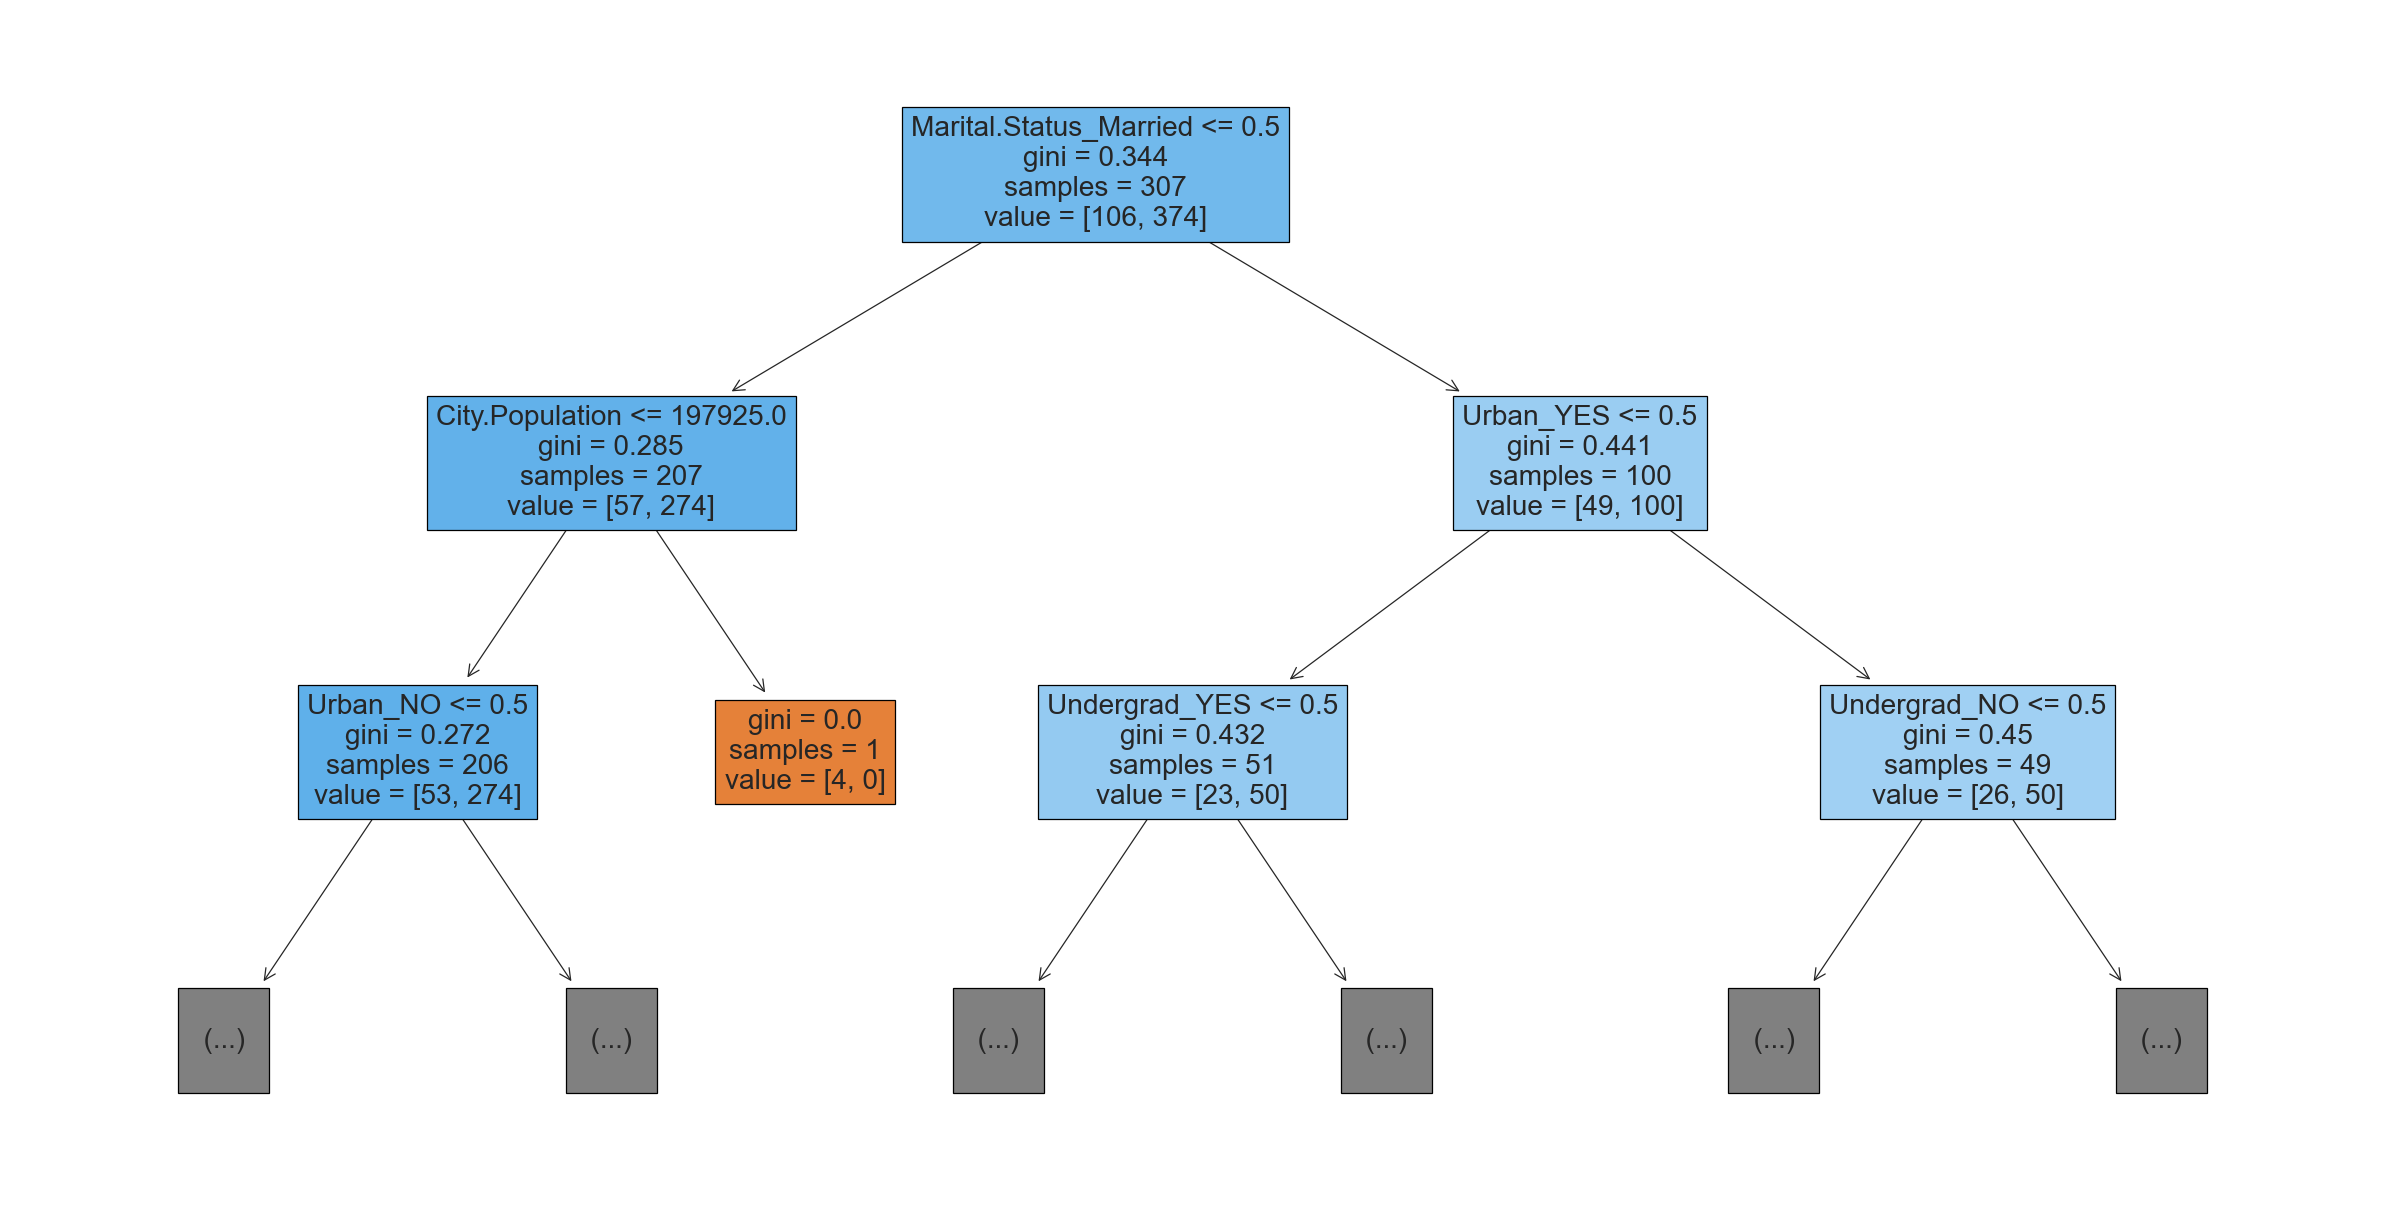

In [35]:
tree.plot_tree(rfc2.estimators_[0], feature_names=['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married', 'Urban_NO', 'Urban_YES'], filled=True, max_depth=2)
plt.show()

In [36]:
# Model Validation Technique using K-Fold Cross Validation

In [37]:
kf = KFold(n_splits = 5)
scores = cross_val_score(RandomForestClassifier(), x, y, cv = kf)
scores

array([0.74166667, 0.69166667, 0.70833333, 0.775     , 0.775     ])

In [38]:
scores.mean()

0.7383333333333333

In [39]:
# Chi2 test for feature selection

In [40]:
test = SelectKBest(score_func=chi2, k=5)
test.fit(x,y)
test.scores_

array([2.04564389e+03, 1.17091258e-02, 4.89292491e-02, 4.51654607e-02,
       3.02172482e-01, 7.56911744e-01, 7.04434188e-03, 6.95103933e-03])

In [41]:
chi_table = pd.DataFrame({
    'Features' : x.columns,
    'chi_stat_values' : test.scores_
})
chi_table.sort_values(by='chi_stat_values', ascending=False)

,Features,chi_stat_values
0,City.Population,2045.643886
5,Marital.Status_Married,0.756912
4,Marital.Status_Divorced,0.302172
2,Undergrad_NO,0.048929
3,Undergrad_YES,0.045165
1,Work.Experience,0.011709
6,Urban_NO,0.007044
7,Urban_YES,0.006951


In [42]:
rfc3 = RandomForestClassifier()
rfc3.fit(xtrain, ytrain)
ypred3 = rfc3.predict(xtest)
ypred3

array(['Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 

In [46]:
print(classification_report(ytest, ypred3))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        23
       Risky       0.80      0.94      0.86        97

    accuracy                           0.76       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.76      0.70       120



In [47]:
rfc3.feature_importances_

array([0.52564601, 0.37379983, 0.013097  , 0.01323628, 0.02382946,
       0.02676234, 0.01138504, 0.01224405])

In [48]:
ig_sel2 = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : rfc3.feature_importances_
})
ig_sel2.sort_values(by='info_gain', ascending=False)

,features,info_gain
0,City.Population,0.525646
1,Work.Experience,0.373800
5,Marital.Status_Married,0.026762
4,Marital.Status_Divorced,0.023829
3,Undergrad_YES,0.013236
2,Undergrad_NO,0.013097
7,Urban_YES,0.012244
6,Urban_NO,0.011385


In [49]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married', 'Urban_NO',
       'Urban_YES'],
      dtype='object')

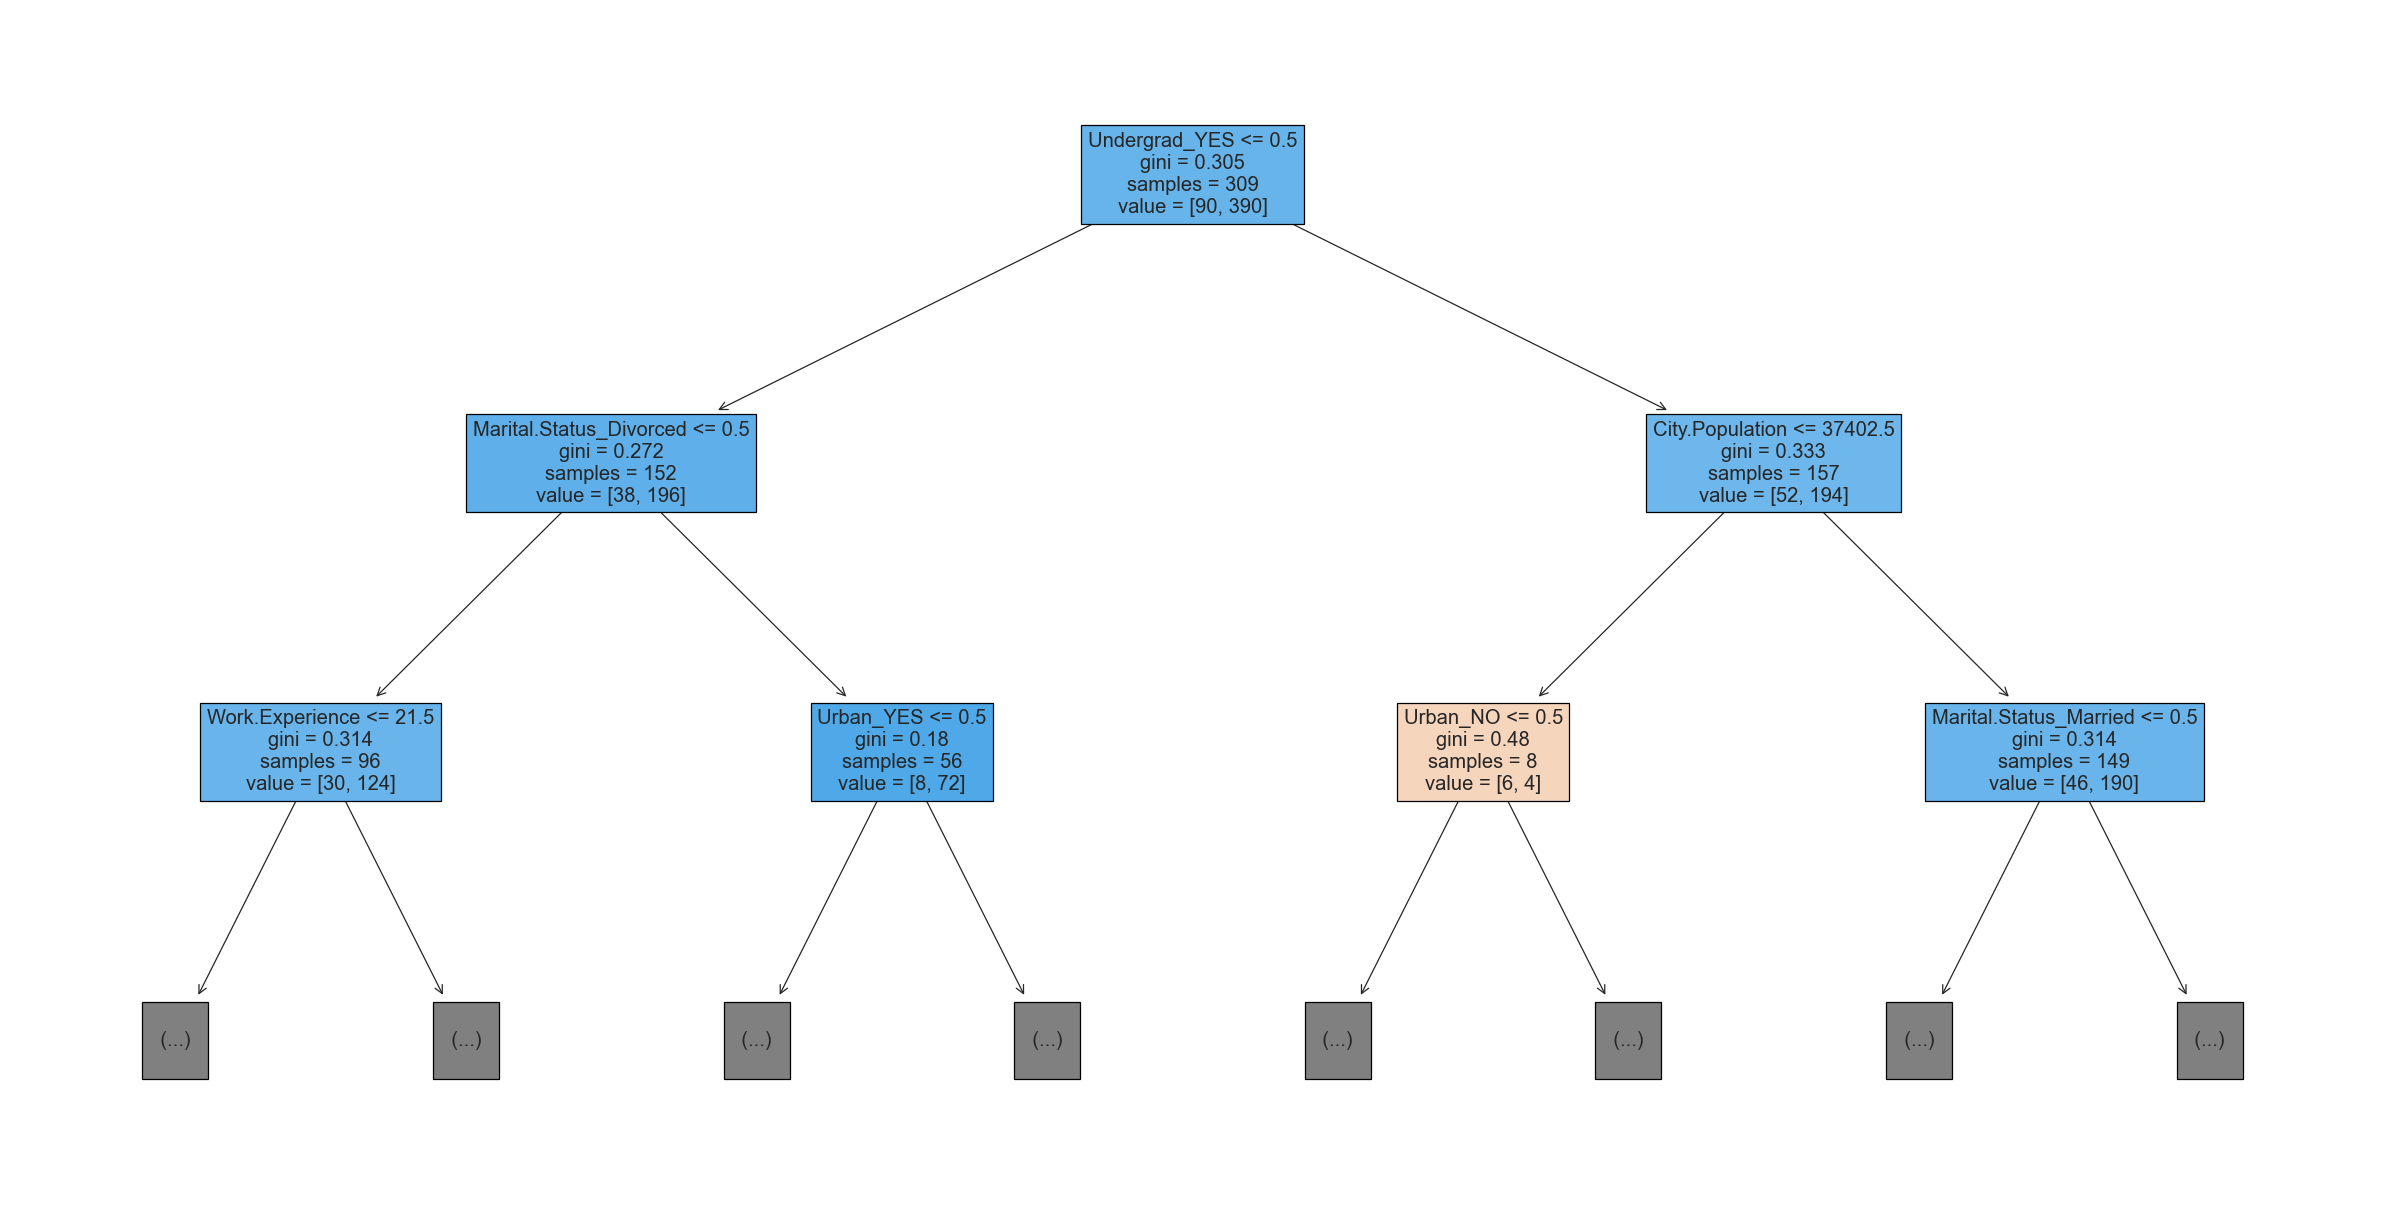

In [50]:
tree.plot_tree(rfc3.estimators_[0], feature_names=['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married', 'Urban_NO', 'Urban_YES'], filled=True, max_depth=2)
plt.show()

In [51]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        23
       Risky       0.80      0.93      0.86        97

    accuracy                           0.75       120
   macro avg       0.40      0.46      0.43       120
weighted avg       0.64      0.75      0.69       120



In [52]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        23
       Risky       0.80      0.93      0.86        97

    accuracy                           0.75       120
   macro avg       0.40      0.46      0.43       120
weighted avg       0.64      0.75      0.69       120



In [53]:
print(classification_report(ytest, ypred3))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        23
       Risky       0.80      0.94      0.86        97

    accuracy                           0.76       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.76      0.70       120



In [55]:
scores.mean() #Average accuracy of all possible models

0.7383333333333333